Class assignment (dataquest.io/dashboard)

Data source: https://raw.githubusercontent.com/buswedg/dataquest/master/Machine%20Learning%20in%20Python/Introduction%20to%20Evaluating%20Binary%20Classifiers/data/admissions.csv

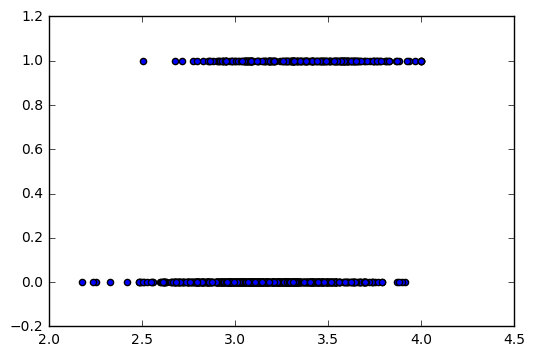

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import data
admissions = pd.read_csv ("admissions.csv")
#plot gre scores vs admission
plt.scatter(x = admissions[['gpa']], y = admissions[['admit']])
plt.show()

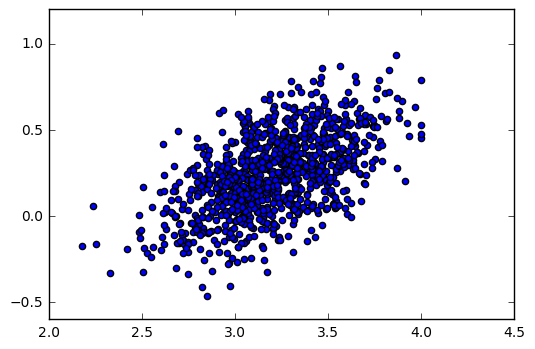

In [33]:
#Use linear regression to predict
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(admissions[["gpa", "gre"]], admissions["admit"])
admit_prediction =  linear_model.predict(admissions[['gpa', 'gre']])

#Plot gpa column vs predictions
plt.scatter(x = admissions[['gpa']], y = admit_prediction)
plt.show()

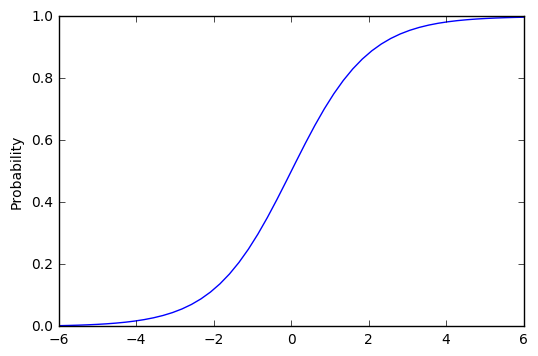

In [2]:


# Logit Function
def logit(x):
  # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
  return np.exp(x) / (1 + np.exp(x))

# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logit function.
y = logit(x)

# Plot Logit function
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()


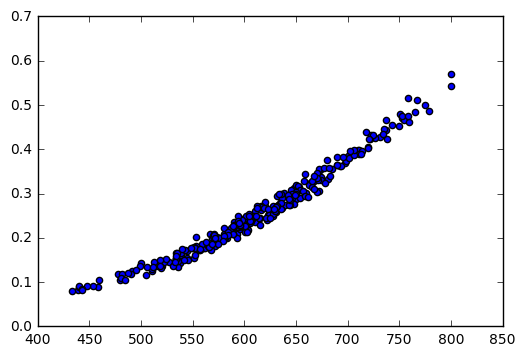

In [70]:
#Train  logistic model with first 700 values 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
learn_set = admissions[0:700]
logistic_model.fit(learn_set[['gre', 'gpa']], learn_set["admit"])


#Test model on last 300 values
test_set = admissions[700:admissions.shape[0]]
fitted_labels = logistic_model.predict_proba(test_set[['gre',"gpa"]])
plt.scatter(x = test_set[['gre']], y = fitted_labels[:,1])
plt.show()

In [55]:
#Calculate percent admitted in test set
percent_admitted = len (test_set [test_set['admit'] == 1])/len (test_set)
print ('Percent admitted in test set = ', percent_admitted)

Percent admitted in test set =  0.26666666666666666


In [61]:
#Use logistic model to predict admission of test_set. 
test_predict = logistic_model.predict(test_set[['gre',"gpa"]])
#Check if predictions match actual data
True_predictions = (test_predict == test_set['admit'])
#Calculate accuracy of predictions
Accuracy_test = len(True_predictions[True_predictions])/len(test_set)
print ('Accuracy of Logistic model=', Accuracy_test)

Accuracy of Logistic model= 0.75


auc_test =  0.827045454545
auc_train =  0.796425646159
auc_diff = 0.030619808386


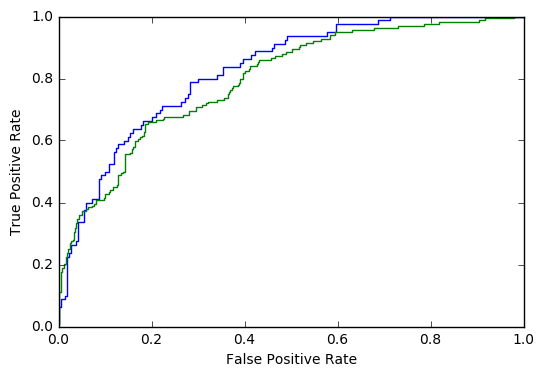

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

#Compute area under curve of test set
auc_test = roc_auc_score(test_set[['admit']], fitted_labels[:,1])
print ('auc_test = ', auc_test)

#Compute area under curve of training set
fitted_learn_labels = logistic_model.predict_proba(learn_set[['gre',"gpa"]])
auc_train = roc_auc_score(learn_set[['admit']], fitted_learn_labels[:,1])
print ('auc_train = ', auc_train)

#Compute difference of AUCs
auc_diff = auc_test - auc_train
print ('auc_diff =', auc_diff)

#Calculate ROC curves
roc_test = roc_curve(test_set[['admit']], fitted_labels[:,1])
roc_train = roc_curve(learn_set[['admit']], fitted_learn_labels[:,1])

#Plot ROC curves

plt.plot(roc_test[0],  roc_test[1])
plt.plot(roc_train[0],  roc_train[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
